In [1]:
import pandas as pd
import numpy as np
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from IPython.display import display

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/peter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/peter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Cleaning Step 

## Import Data

In [3]:
dataset = pd.read_csv('netflix_titles.csv')
print(dataset.shape)
dataset.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...




## Drop unnecessary column

In [4]:
dataset_clean = dataset.drop(['show_id','type','cast','date_added','rating','duration','listed_in'], axis=1)
dataset_clean.head()

,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,South Africa,2021,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,NaN,2021,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,2021,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,India,2021,In a city of coaching centers known to train I...


## Fill NaN

In [5]:
# We fill the missing value with 'unknown'
dataset_clean = dataset_clean.fillna('Unknown')
dataset_clean.head() # we could see the country has been filled by Unknown

,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown,South Africa,2021,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,Unknown,2021,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,Unknown,Unknown,2021,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,Unknown,India,2021,In a city of coaching centers known to train I...


## Remove stop word in description

In [6]:
stop_words = stopwords.words('english')
dataset_clean['description'] = dataset_clean['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dataset_clean['description'].head() # we could see that the stopwords has been removed in description.

0    As father nears end life, filmmaker Kirsten Jo...
1    After crossing paths party, Cape Town teen set...
2    To protect family powerful drug lord, skilled ...
3    Feuds, flirtations toilet talk go among incarc...
4    In city coaching centers known train India’s f...
Name: description, dtype: object

## Lemmatize the word in description

In [7]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dataset_clean['description'] = dataset_clean['description'].apply(lemmatize_words)
dataset_clean['description'].head()
# we could see the second line crossing is lemmatized to cross, this could increase the accuracy of searching

0    As father near end life, filmmaker Kirsten Joh...
1    After cross paths party, Cape Town teen set pr...
2    To protect family powerful drug lord, skilled ...
3    Feuds, flirtations toilet talk go among incarc...
4    In city coach center know train India’s finest...
Name: description, dtype: object

## Convert description into lower case

In [8]:
dataset_clean['description'] = dataset_clean['description'].apply(lambda x: x.lower() if type(x) == str else x)
dataset_clean.head()

,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"as father near end life, filmmaker kirsten joh..."
1,Blood & Water,Unknown,South Africa,2021,"after cross paths party, cape town teen set pr..."
2,Ganglands,Julien Leclercq,Unknown,2021,"to protect family powerful drug lord, skilled ..."
3,Jailbirds New Orleans,Unknown,Unknown,2021,"feuds, flirtations toilet talk go among incarc..."
4,Kota Factory,Unknown,India,2021,in city coach center know train india’s finest...


# Index Part

## Inport tools from sklearn 

In [9]:
!pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

## Get description in csv column into document list

In [11]:
documents = dataset_clean['description'].to_numpy()
documents[:10]

array(['as father near end life, filmmaker kirsten johnson stag death inventive comical ways help face inevitable.',
       'after cross paths party, cape town teen set prove whether private-school swim star sister abduct birth.',
       'to protect family powerful drug lord, skilled thief mehdi expert team robbers pull violent deadly turf war.',
       'feuds, flirtations toilet talk go among incarcerate women orleans justice center new orleans gritty reality series.',
       'in city coach center know train india’s finest collegiate minds, earnest unexceptional student friends navigate campus life.',
       'the arrival charismatic young priest bring glorious miracles, ominous mysteries renew religious fervor die town desperate believe.',
       "equestria's divided. but bright-eyed hero believe earth ponies, pegasi unicorns pal — and, hoof heart, she’s determine prove it.",
       'on photo shoot ghana, american model slip back time, become enslave plantation bear witness agony ance

## Get vocabulary list

In [12]:
documents_vectorized = vectorizer.fit_transform(documents)
vocabulary = vectorizer.get_feature_names_out()

In [13]:
vocabulary

array(['000', '007', '009', ..., 'łukasz', 'ōarai', 'şeref'], dtype=object)

In [14]:
print ('We have a {} movies with a {} term vocabulary'.format(*documents_vectorized.shape))

We have a 8807 movies with a 17441 term vocabulary


## Term Frequency Matrix

In [15]:
df = pd.DataFrame(documents_vectorized.toarray(), columns=vocabulary)
doc_ids = df.index.values
print('The shape of the term frequency matrix is {}'.format(df.shape))
print('Which means it contains {} movies with {} term vocabulary'.format(*df.shape))
df[:5]

The shape of the term frequency matrix is (8807, 17441)
Which means it contains 8807 movies with 17441 term vocabulary


,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Finding DF/IDF for each term 

In [16]:
dfs = (df > 0).sum(axis=0)
print('The list below is the document frequency DF')
dfs
# first get the document frequency DF (i.e. how many documents does each phrase appear in?): 

The list below is the document frequency DF


000       38
007        4
009        1
10        44
100       18
          ..
ömer       1
über       2
łukasz     1
ōarai      1
şeref      1
Length: 17441, dtype: int64

In [17]:
N = df.shape[0]
print('Our total ducument is {} which is the total number of movie in dataset '.format(N))

Our total ducument is 8807 which is the total number of movie in dataset 


## ${idf}_t$ is calculated by $idf_t = log\frac{N}{df}$ 

In [18]:
idfs = np.log10(N/dfs)
idfs[:5]

000    2.365044
007    3.342768
009    3.944828
10     2.301375
100    2.689555
dtype: float64

# **BM25 Score**
## The formula for BM25 Score is

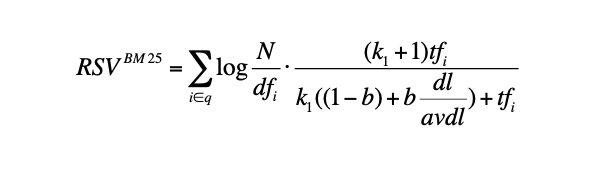

## Define all the variables

In [19]:
k_1 = 1.2 # single value
b = 0.8 # single value
## considering all words in doc
dls = [len(d.split(' ')) for d in documents] # vector
## considering words minus stop words in doc. 
dls = df.sum(axis=1).tolist()
avgdl = np.mean(dls) # single value

## Calculate BM25 Score

In [20]:
numerator = np.array((k_1 + 1) * df)
denominator = np.array(k_1 *((1 - b) + b * (dls / avgdl))).reshape(N,1) + np.array(df)

BM25_tf = numerator / denominator

idfs = np.array(idfs)

BM25_score = BM25_tf * idfs

In [21]:
bm25_idf = pd.DataFrame(BM25_score, columns=vocabulary)
print('The dataframe below is the BM25 scores for each documents.')
bm25_idf

The dataframe below is the BM25 scores for each documents.


,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a function cleaning query

In [22]:
def clean_query(query):
    cleaned_query=word_tokenize(query)
    specific_words=['want','watch','see','about','relate','I','movie','TV Show'] #specific words that user might used which will not related to movie
    cleaned_query=[word for word in cleaned_query if word not in stopwords.words('english')]
    cleaned_query=[word for word in cleaned_query if word not in specific_words]
    cleaned_query=[word.lower() for word in cleaned_query if word.isalpha()]
    return cleaned_query

In [23]:
#example for a query
cleaned_query=clean_query('I want to watch a movie about a father nears the end of his life')

## Find the score for the query and sorted from large to small

In [24]:
def score(query):
    cleaned_query=clean_query(query)
    cleaned_query_only_df = bm25_idf[cleaned_query]
    score_q_d = cleaned_query_only_df.sum(axis=1)
    sorted_score=sorted(zip(documents,score_q_d.values), key = lambda tup:tup[1], reverse=True)
    result = pd.DataFrame(sorted_score)
    return result
    

In [25]:
#score(cleaned_query)[0][1]

In [26]:
#for n in range(2):
#    movie=(dataset_clean.loc[dataset_clean['description'].str.contains(score(cleaned_query)[0][n])])
#    print('The {} relevant movie with the query you given is :' .format(str(n+1)+("th" if 3<=n%100<=20 else {0:"st",1:"nd",2:"rd"}.get(n%10, "th"))))
#    display(movie)

## Create a function for recommondation

In [36]:
def recommondation(query,n):
    score(query)
    for i in range(n):
        movie=(dataset_clean.loc[dataset_clean['description'].str.contains(score(query)[0][i])])
        print('The {} relevant movie with the query you given is :' .format(str(i+1)+("th" if 3<=n%100<=20 else {0:"st",1:"nd",2:"rd"}.get(n%10, "th"))))
        display(movie)
    

In [39]:
recommondation('I want to watch a movie about a father nears the end of his life',3)

The 1th relevant movie with the query you given is :


,title,director,country,release_year,description
1972,Black,Raja Chanda,India,2015,a small-town man take dangerous gangster aveng...


The 2th relevant movie with the query you given is :


,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"as father near end life, filmmaker kirsten joh..."


The 3th relevant movie with the query you given is :


,title,director,country,release_year,description
4718,Like Father,Lauren Miller Rogen,United States,2018,"after leave altar, workaholic advertise execut..."


# Final Testing

In [44]:
#Please enter what kind of movie are you looking for:
query = 'I want to watch a movie about young priest'
#Please type how many movies do you want to recommond
n=4
recommondation(query,n)

The 1th relevant movie with the query you given is :


,title,director,country,release_year,description
8323,The Good Catholic,Paul Shoulberg,United States,2017,a young priest’s faith test find attract woman...


The 2th relevant movie with the query you given is :


,title,director,country,release_year,description
4909,Holy Goalie,Curro Velázquez,Spain,2017,a young priest coach team uncoordinated monks ...


The 3th relevant movie with the query you given is :


,title,director,country,release_year,description
8408,The lynx,Stanisław Różewicz,Poland,1982,a priest's duties test young guerrilla ask abs...


The 4th relevant movie with the query you given is :


,title,director,country,release_year,description
8548,The Vatican Tapes,Mark Neveldine,United States,2015,a young woman hospitalize infect wind become p...
